In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'netflix_titles.csv'  # Update with the correct path if needed
netflix_data = pd.read_csv(file_path)

# Display dataset info
print("Dataset Info:")
print(netflix_data.info())

# Clean the data: Handle missing values
netflix_data['director'] = netflix_data['director'].fillna('Unknown')
netflix_data['cast'] = netflix_data['cast'].fillna('Unknown')
netflix_data['country'] = netflix_data['country'].fillna('Not Specified')
netflix_data['date_added'] = netflix_data['date_added'].fillna('Unknown Date')

# Check for remaining missing values
print("\nMissing Values Summary:")
print(netflix_data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Missing Values Summary:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
descriptio


Number of TV Shows: 2676
Number of Movies Released After 2015: 3619


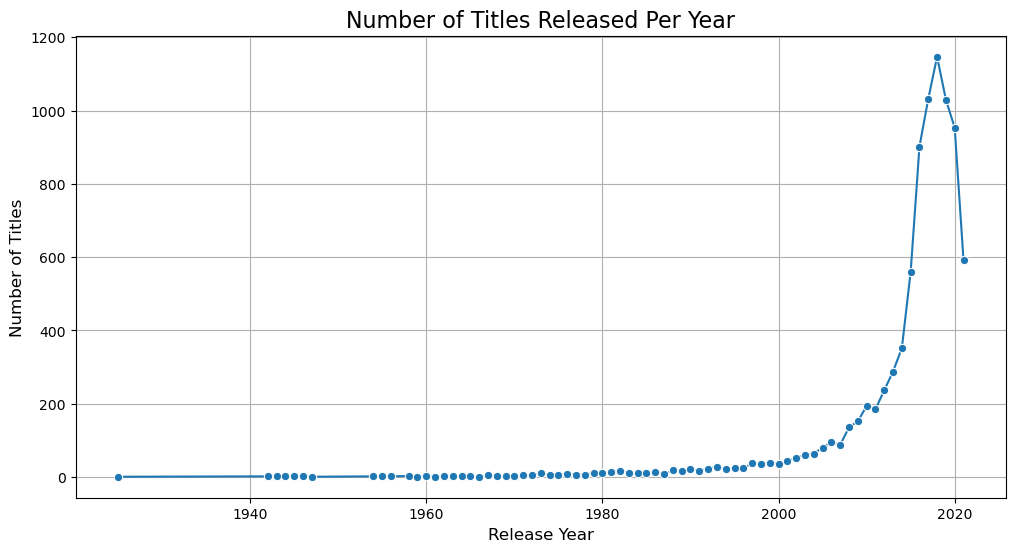

In [3]:
# Filter examples
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']
movies_after_2015 = netflix_data[(netflix_data['type'] == 'Movie') & (netflix_data['release_year'] > 2015)]

print(f"\nNumber of TV Shows: {tv_shows.shape[0]}")
print(f"Number of Movies Released After 2015: {movies_after_2015.shape[0]}")

# Group by release year and count titles
titles_per_year = netflix_data.groupby('release_year').size().reset_index(name='count')

# Group by genre and count titles
genre_data = netflix_data['listed_in'].str.split(', ').explode()
genre_counts = genre_data.value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Plot: Titles released per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=titles_per_year, x='release_year', y='count', marker='o')
plt.title('Number of Titles Released Per Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\lokes\AppData\Local\Temp\ipykernel_15928\3487945785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts.head(10), x='count', y='genre', palette='viridis')


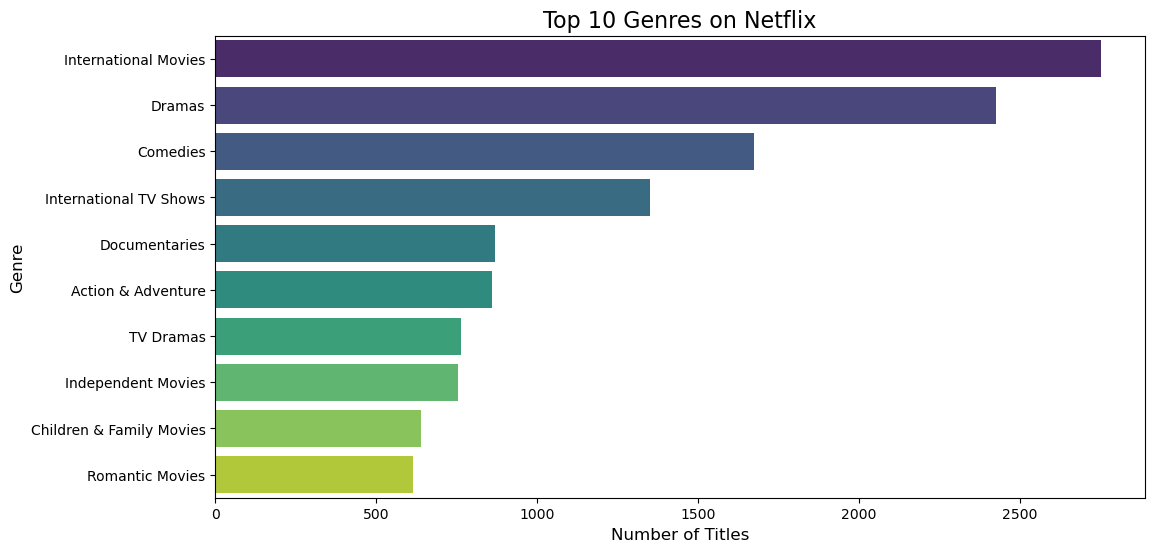

In [4]:

# Plot: Top 10 genres by count
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts.head(10), x='count', y='genre', palette='viridis')
plt.title('Top 10 Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


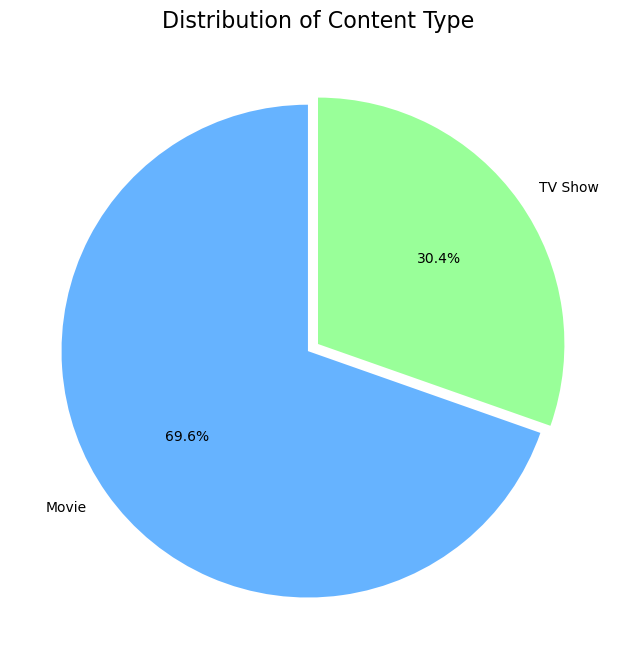

In [6]:
# Distribution of content type
content_type_counts = netflix_data['type'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
content_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'], explode=[0.05, 0])
plt.title('Distribution of Content Type', fontsize=16)
plt.ylabel('')  # Remove y-axis label
plt.show()

C:\Users\lokes\AppData\Local\Temp\ipykernel_15928\30622403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')


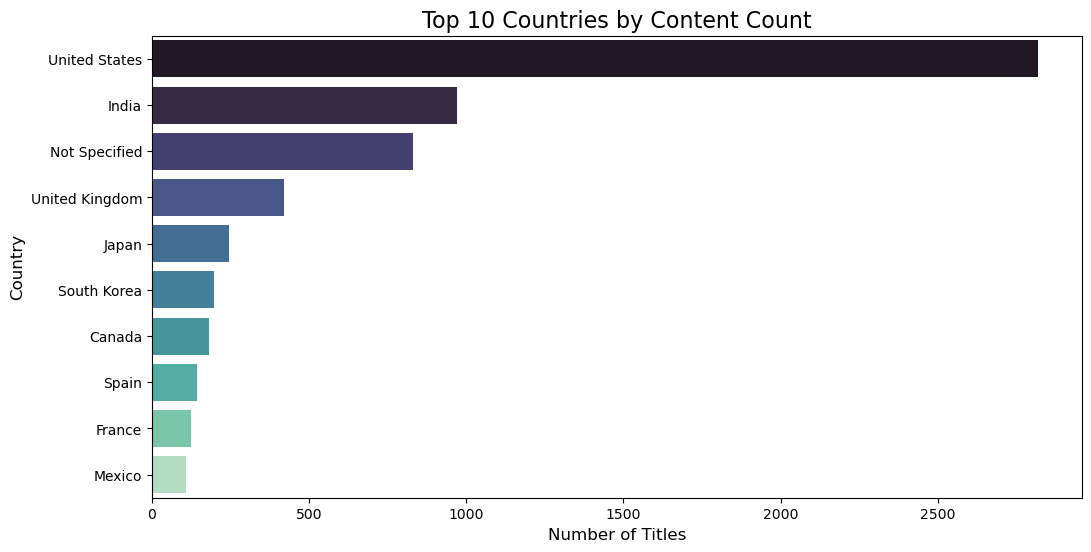

In [7]:
# Count titles by country
country_counts = netflix_data['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')
plt.title('Top 10 Countries by Content Count', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

C:\Users\lokes\AppData\Local\Temp\ipykernel_15928\2795712714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')


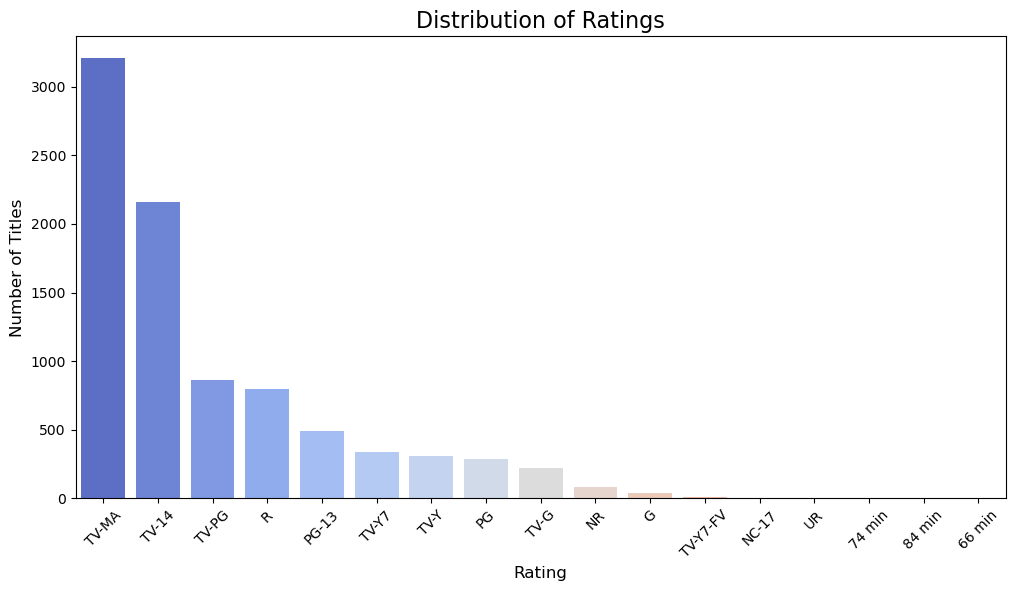

In [8]:
# Count titles by rating
rating_counts = netflix_data['rating'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\lokes\AppData\Local\Temp\ipykernel_15928\163958688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)


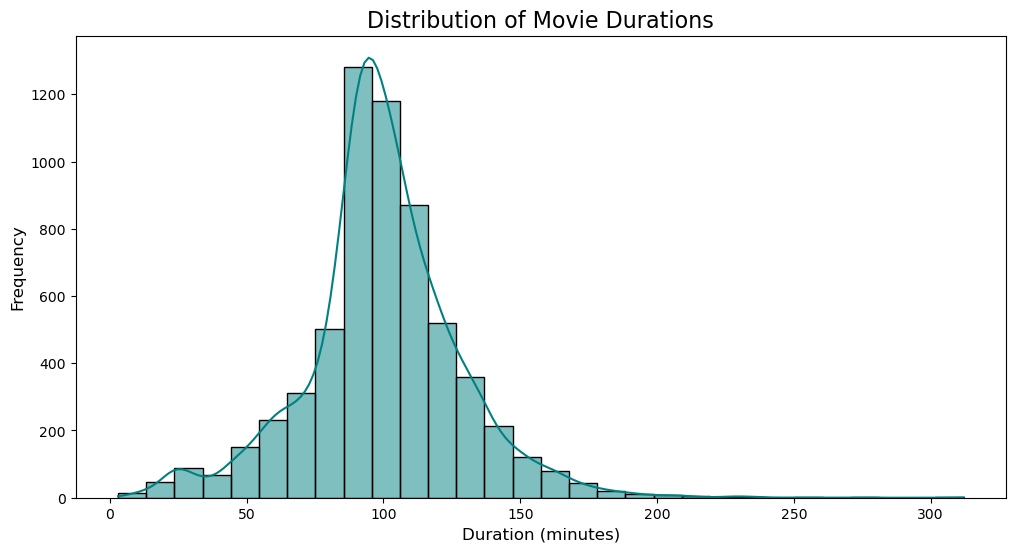

In [9]:
# Filter movies and extract duration in minutes
movies = netflix_data[netflix_data['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(movies['duration'], bins=30, kde=True, color='teal')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\lokes\AppData\Local\Temp\ipykernel_15928\2395221536.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='cubehelix')


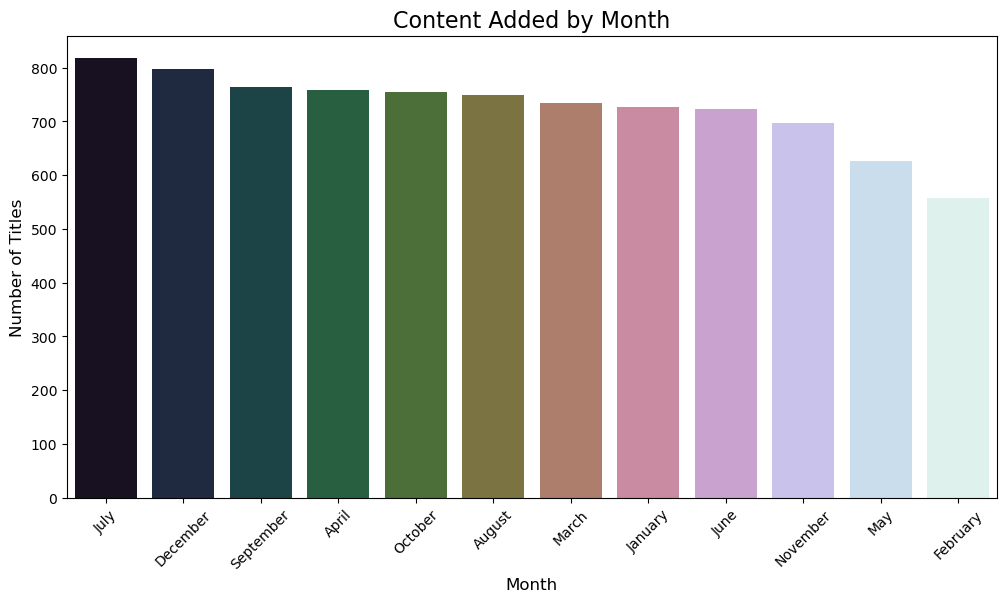

In [10]:
# Extract month from 'date_added'
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')
netflix_data['month_added'] = netflix_data['date_added'].dt.month_name()

# Count by month
monthly_counts = netflix_data['month_added'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='cubehelix')
plt.title('Content Added by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.show()

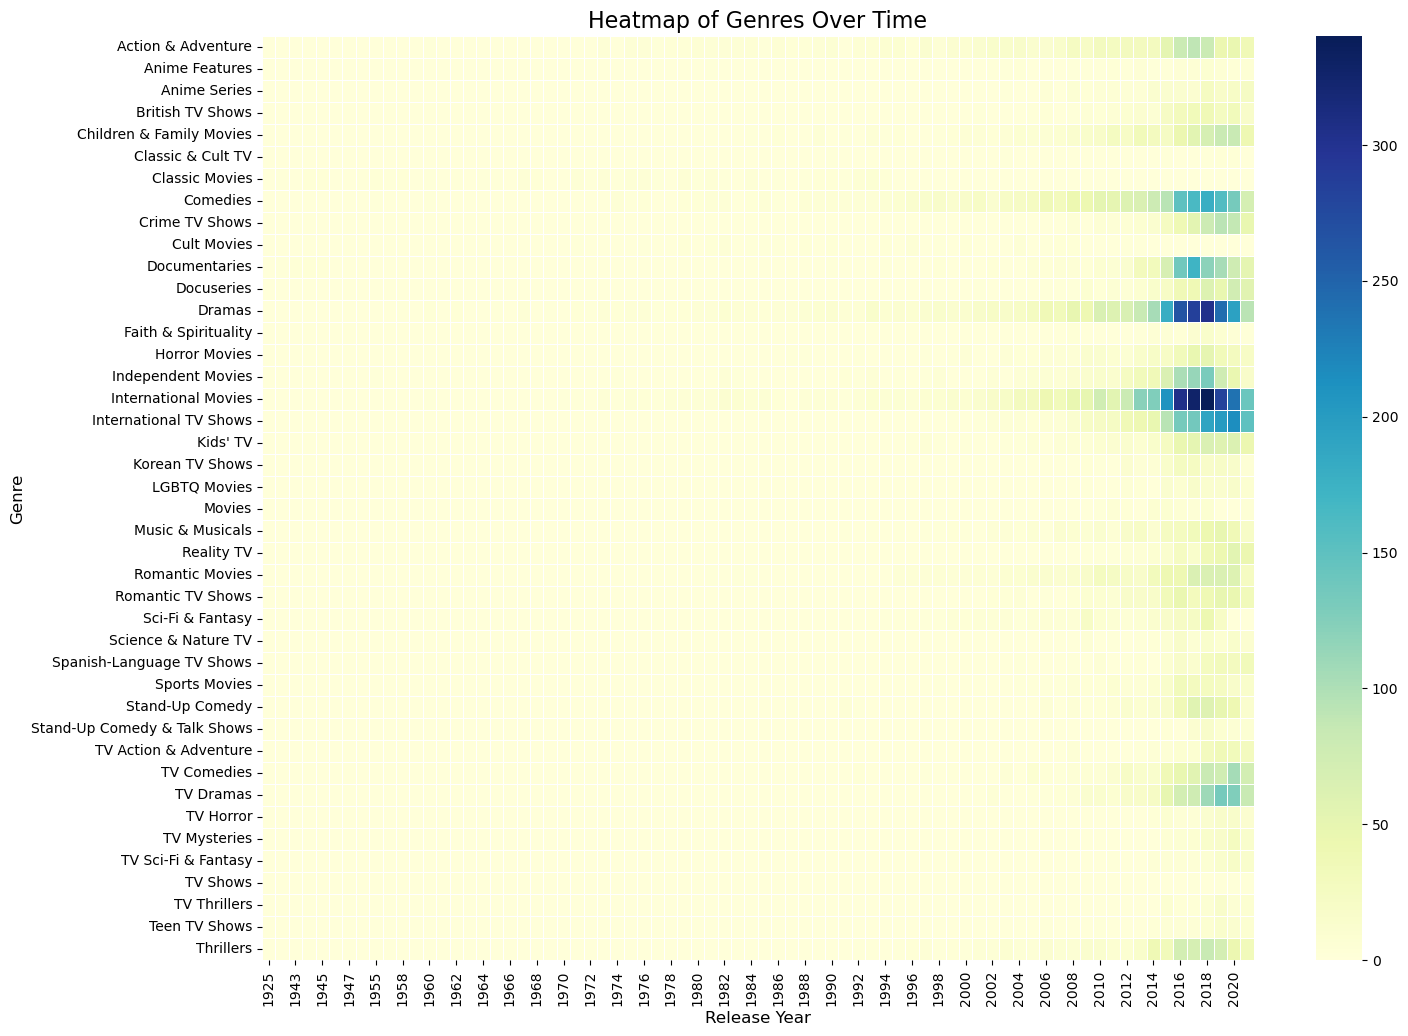

In [11]:
# Explode genres and group by release year
genre_year_data = netflix_data[['release_year', 'listed_in']].copy()
genre_year_data = genre_year_data.dropna()
genre_year_data['listed_in'] = genre_year_data['listed_in'].str.split(', ')
genre_year_data = genre_year_data.explode('listed_in')

# Pivot table for heatmap
genre_heatmap = genre_year_data.pivot_table(index='listed_in', columns='release_year', aggfunc='size', fill_value=0)

# Plot
plt.figure(figsize=(16, 12))
sns.heatmap(genre_heatmap, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Genres Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()